<a href="https://colab.research.google.com/github/nadiasrwt/Pemrograman_Python/blob/main/Pertemuan%2011_Image%20Classification%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [140]:
ls

'Copy of Untitled0.ipynb'   nmodel_scene/     Untitled1.ipynb
 dataset/                   nnmodel_scene/    Untitled2.ipynb
 GMB_08_test.jpg            Untitled0.ipynb   Untitled3.ipynb


In [141]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [142]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [143]:
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
  # the pixel intensities to the range [0, 1], and then update our
  # image list
  image = Image.open(imagePath)
  # prepocessing
  image = np.array(image.resize((256, 256))) / 255.0
  data.append(image)
  # extract the class label from the file path and update the
  #label list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [144]:
print(labels)

['GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10',

In [145]:
# encode the labes, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [146]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [147]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(440, 256, 256, 3)
(147, 256, 256, 3)


In [148]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
# fully connected layers
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 125, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 61504)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               6150500   
_________________________________________________________________
dense_21 (Dense)             (None, 5)               

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
     Flatten(input_shape=(64*64*3,)),
     Dense(100, activation="relu", name="layer1"),
     Dense(16, activation="relu", name="layer2"),
     Dense(16, activation="relu", name="layer3"),
     Dense(3, activation="softmax", name="layer4"),
    ]
)

In [149]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 125, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 61504)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               6150500   
_________________________________________________________________
dense_21 (Dense)             (None, 5)               

In [150]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 17s 1s/step - loss: 4.3321 - accuracy: 0.2045 - val_loss: 1.5826 - val_accuracy: 0.2585
Epoch 2/25
14/14 [==============================] - 17s 1s/step - loss: 1.5256 - accuracy: 0.3205 - val_loss: 1.4427 - val_accuracy: 0.4966
Epoch 3/25
14/14 [==============================] - 17s 1s/step - loss: 1.3119 - accuracy: 0.4841 - val_loss: 1.2342 - val_accuracy: 0.5306
Epoch 4/25
14/14 [==============================] - 17s 1s/step - loss: 1.0270 - accuracy: 0.6523 - val_loss: 0.9817 - val_accuracy: 0.6122
Epoch 5/25
14/14 [==============================] - 17s 1s/step - loss: 0.8280 - accuracy: 0.6977 - val_loss: 0.8201 - val_accuracy: 0.7483
Epoch 6/25
14/14 [==============================] - 17s 1s/step - loss: 0.6190 - accuracy: 0.8227 - val_loss: 0.7690 - val_accuracy: 0.7483
Epoch 7/25
14/14 [==============================] - 17s 1s/step - loss: 0.4565 - accuracy: 0.8750 - val_loss: 0.6931 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


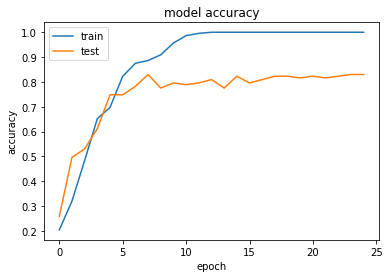

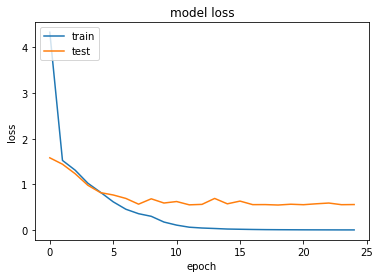

In [151]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [152]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.85      0.82      0.84        34
      GMB_04       0.82      0.87      0.84        31
      GMB_06       0.71      0.74      0.73        27
      GMB_08       0.82      0.88      0.85        26
      GMB_10       0.96      0.83      0.89        29

    accuracy                           0.83       147
   macro avg       0.83      0.83      0.83       147
weighted avg       0.83      0.83      0.83       147



In [153]:
model1.save('nmodel_scene')

INFO:tensorflow:Assets written to: nmodel_scene/assets


In [154]:
import cv2
import matplotlib.pyplot as plt
image1='GMB_08_test.jpg'

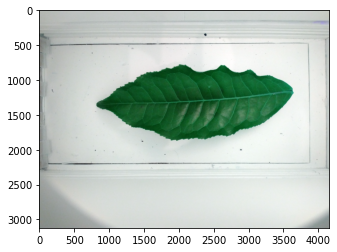

In [155]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [157]:
image_testing = Image.open('GMB_08_test.jpg')
image_testing = np.array(image_testing.resize((256,256))) / 255.0
image_testing.shape

(256, 256, 3)

In [158]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 256, 256, 3)


In [159]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[4.5555564e-05 5.2543658e-07 4.8062335e-05 9.9989557e-01 1.0247710e-05]]
['GMB_08']
